# Supervised Learning - Regression

In [18]:
%pip install pandas
%pip install StandardScaler            
%pip install matplotlib 
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


## Import CSV Daten

In [19]:
# 1. Dataset laden
import pandas as pd
data = pd.read_csv('data/heartdata.csv')

## Check assumptions of a linear regression model

Korrelationsmatrix:
               Unnamed: 0    biking   smoking  heartdisease
Unnamed: 0      1.000000  0.057088  0.052674     -0.051725
biking          0.057088  1.000000  0.015136     -0.935455
smoking         0.052674  0.015136  1.000000      0.309131
heartdisease   -0.051725 -0.935455  0.309131      1.000000

Pearson-Koeffizient Biking: -0.935, p-Wert: 0.0000
Pearson-Koeffizient Smoking: 0.309, p-Wert: 0.0000


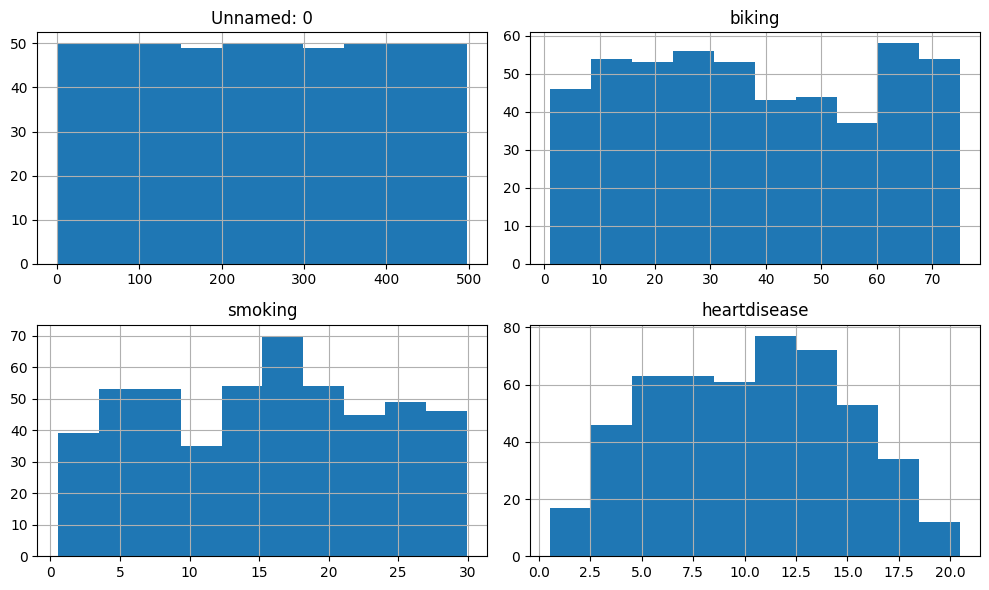

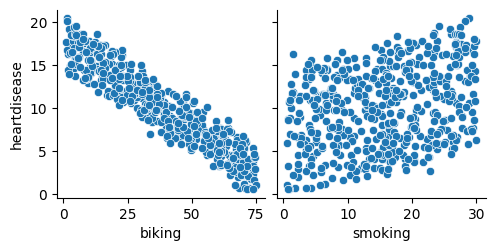

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Korrelationsmatrix
corr_matrix = data.corr()
print("Korrelationsmatrix:\n", corr_matrix)

# Pearson-Test für die Variablen
pearson_coef_biking, p_biking = stats.pearsonr(data['biking'], data['heartdisease'])
pearson_coef_smoking, p_smoking = stats.pearsonr(data['smoking'], data['heartdisease'])
print(f"\nPearson-Koeffizient Biking: {pearson_coef_biking:.3f}, p-Wert: {p_biking:.4f}")
print(f"Pearson-Koeffizient Smoking: {pearson_coef_smoking:.3f}, p-Wert: {p_smoking:.4f}")

# Histogramme
data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Scatterplots
sns.pairplot(data, y_vars=['heartdisease'], x_vars=['biking', 'smoking'])
plt.show()

## Fit a linear regression model

In [21]:
from sklearn.linear_model import LinearRegression

X = data[['biking', 'smoking']]
y = data['heartdisease']

model = LinearRegression()
model.fit(X, y)

LinearRegression()

## Evaluate the model


Koeffizienten: Biking=-0.200, Smoking=0.178
Intercept: 14.98
R²-Wert: 0.98


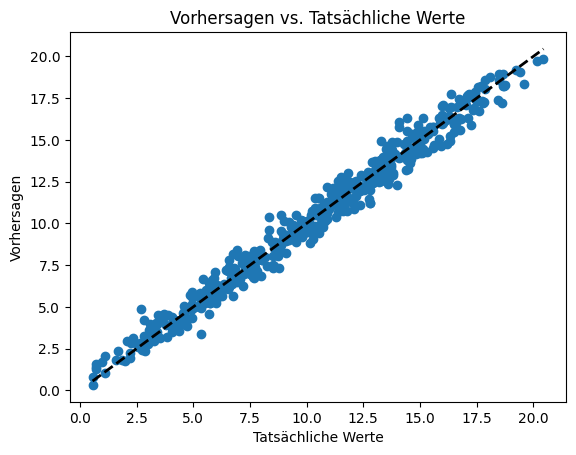

In [22]:
print(f"\nKoeffizienten: Biking={model.coef_[0]:.3f}, Smoking={model.coef_[1]:.3f}")
print(f"Intercept: {model.intercept_:.2f}")

from sklearn.metrics import r2_score
predictions = model.predict(X)
print(f"R²-Wert: {r2_score(y, predictions):.2f}")

plt.scatter(y, predictions)
plt.xlabel('Tatsächliche Werte')
plt.ylabel('Vorhersagen')
plt.title('Vorhersagen vs. Tatsächliche Werte')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.show()

## Train the model using cross-validation

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_cv = LinearRegression()
model_cv.fit(X_train, y_train)

test_predictions = model_cv.predict(X_test)
print(f"\nTest-R²: {r2_score(y_test, test_predictions):.2f}")


Test-R²: 0.98
